In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("./MI_12H0.csv")
df.head(2)

,id,age,gender,bmi,children,smoker,region,charges
0,1,19,female,27.90,0,yes,southwest,16884.9240
1,2,18,male,33.77,1,no,southeast,1725.5523


In [5]:
df.shape

(2772, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        2772 non-null   int64  
 1   age       2772 non-null   int64  
 2   gender    2772 non-null   object 
 3   bmi       2772 non-null   float64
 4   children  2772 non-null   int64  
 5   smoker    2772 non-null   object 
 6   region    2772 non-null   object 
 7   charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 173.4+ KB


In [7]:
df.describe()

,id,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,1386.500000,39.109668,30.701349,1.101732,13261.369959
std,800.351798,14.081459,6.129449,1.214806,12151.768945
min,1.000000,18.000000,15.960000,0.000000,1121.873900
25%,693.750000,26.000000,26.220000,0.000000,4687.797000
50%,1386.500000,39.000000,30.447500,1.000000,9333.014350
75%,2079.250000,51.000000,34.770000,2.000000,16577.779500
max,2772.000000,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isna().sum()

id          0
age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.duplicated().sum()

0

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(2772, 8)

In [13]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['age', 'bmi', 'children'], dtype=object)

In [14]:
le = LabelEncoder()

In [15]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

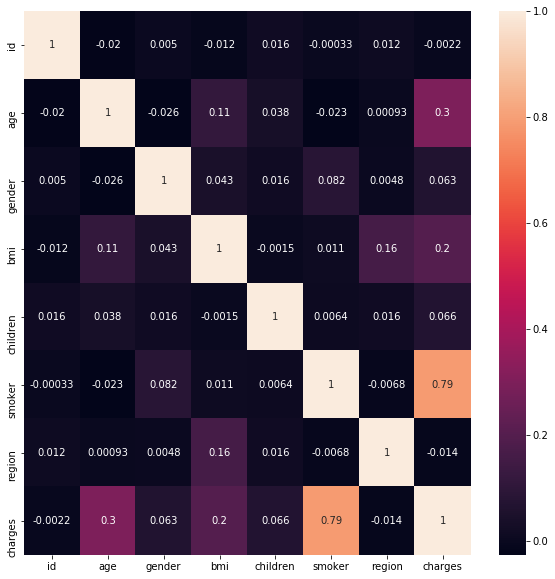

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [17]:
df.head(2)

,id,age,gender,bmi,children,smoker,region,charges
0,1,19,0,27.90,0,1,3,16884.9240
1,2,18,1,33.77,1,0,2,1725.5523


In [18]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [19]:
y.value_counts()

5615.36900     4
8569.86180     4
7348.14200     4
1121.87390     4
21595.38229    4
              ..
5124.18870     2
10043.24900    2
39836.51900    2
7358.17565     2
9140.95100     2
Name: charges, Length: 1337, dtype: int64

In [20]:
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [23]:
X_test

,age,gender,bmi,children,smoker,region
897,-1.405592,1,-0.763828,-0.042760,0,1
2413,-1.116423,1,-1.807795,-0.890324,0,1
2576,-0.538087,0,0.338137,0.804804,0,1
723,-1.405592,1,0.738782,-0.890324,0,3
619,1.196922,0,0.998247,-0.890324,0,3
...,...,...,...,...,...,...
438,0.980046,0,2.471095,3.347497,0,2
1736,1.341506,0,-1.126316,-0.890324,0,1
1293,0.546293,1,-0.734829,1.652369,0,1
1180,0.257125,0,1.643095,-0.042760,0,0


In [24]:
# Create a Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [25]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([ 225.63587007,  226.27670833,  491.71465271,  186.50842854,
        756.97465827,  307.78200965,  442.94785154,  339.350317  ,
        502.28699501,  896.54485212,  935.55602952,  635.38758813,
        253.85199149,  533.8736081 ,  424.69155799,  736.71435355,
        730.45053439,  715.91920186,  671.37441994,  894.34703644,
        749.84011194,  231.31621755, 1504.06950119,  182.0964141 ,
        755.32819208, 1163.55131412,  760.42767045,  839.20584133,
       1157.81549062,  668.9932935 , 1122.32496058,  474.93985619,
        688.06597547,  278.27823546,  203.1713846 , 1546.73770607,
        678.52665384,  651.54204317,  736.71435355,  455.38956674,
       1041.76645532,  182.58316696,  382.67917094,  731.66122443,
        545.38076601, 1328.84982472,  965.86384794,  945.86970159,
        598.60778786,  200.91152738, 1282.35482555,  186.98402201,
        241.68172037,  206.71493237,  452.3441927 ,  361.68794262,
        894.20949335, 1608.58260423,  303.270354  ,  927.34203

In [26]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.7027328163373184

In [27]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

74.16392147634976

In [28]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

87.2181833753395